In [104]:
import numpy as np
import pandas as pd
import torch
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn as nn
import itertools
import os

import torchvision.models as models
import torchvision.transforms as transforms

In [148]:
class Img2Vec():

    def __init__(self, model_name):
        self.device = self.set_device()
        self.architecture = model_name
        self.model = self.initiate_model()
        self.embed = self.assign_layer()

    
    def set_device(self):
        if torch.cuda.is_available():
            device = "cuda:0"
        else:
            device = "cpu"
        
        return device
    
    
    def initiate_model(self):
        
        m = getattr(models, self.architecture) # equ to models.resnet50() 
        model = m(weights='DEFAULT')
        
        return model.to(self.device)
    

    def assign_layer(self):
        embed_dict = {
            "resnet50": self.obtain_children,
            "vgg19":  self.obtain_classifier,
            "efficientnet_b0": self.obtain_classifier
        }

        model_embed = embed_dict[self.architecture]()

        return model_embed
    

    def obtain_children(self):
        model_embed = nn.Sequential(*list(self.model.children())[:-1])
        
        return model_embed


    def obtain_classifier(self):
        self.model.classifier = self.model.classifier[:-1]
        
        return self.model
    

###############################

    def embed_image(self, img):

        transform = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
            ])
        
        img_trans = transform(img)

        if self.device == "cuda:0":
            img_trans = img_trans.cuda()
        
        img_trans = img_trans.unsqueeze(0)

        return self.embed(img_trans)
    
###############################


    def transform_img(self, img):

        transform = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor(),
            transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
            )
            ])
        
        return transform(img)
    

    def direct_to_list(self, source):

        types = (
            '.png',
            '.jpg',
            '.jpeg'
        )
        
        dir_list = os.listdir(source)
        source_list = [
            os.path.join(source, f) for f in dir_list 
            if os.path.splitext(f)[1] in types
            ]

        return source_list
        
    
    def validate_source(self, source):

        if isinstance(source, list):
            source_list = [f for f in source if os.path.isfile(f)]
        elif os.path.isdir(source):
            source_list = self.direct_to_list(source)
        elif os.path.isfile(source):
            source_list = [source]
        else:
            raise ValueError('"source" expected as file, list or directory.')
        
        return source_list

    
    def embedding_dataset(self, source):
        
        self.files = self.validate_source(source)    

        for file in self.files:
            # self.transform_img(Image.open(file))
            


In [159]:
test.embedding_dataset("C:/Users/fergu/Documents/PersonalProjects/Image_Clustering/data/furniture_imgs/table1.jpg")
test.files

['C:/Users/fergu/Documents/PersonalProjects/Image_Clustering/data/furniture_imgs/table1.jpg']

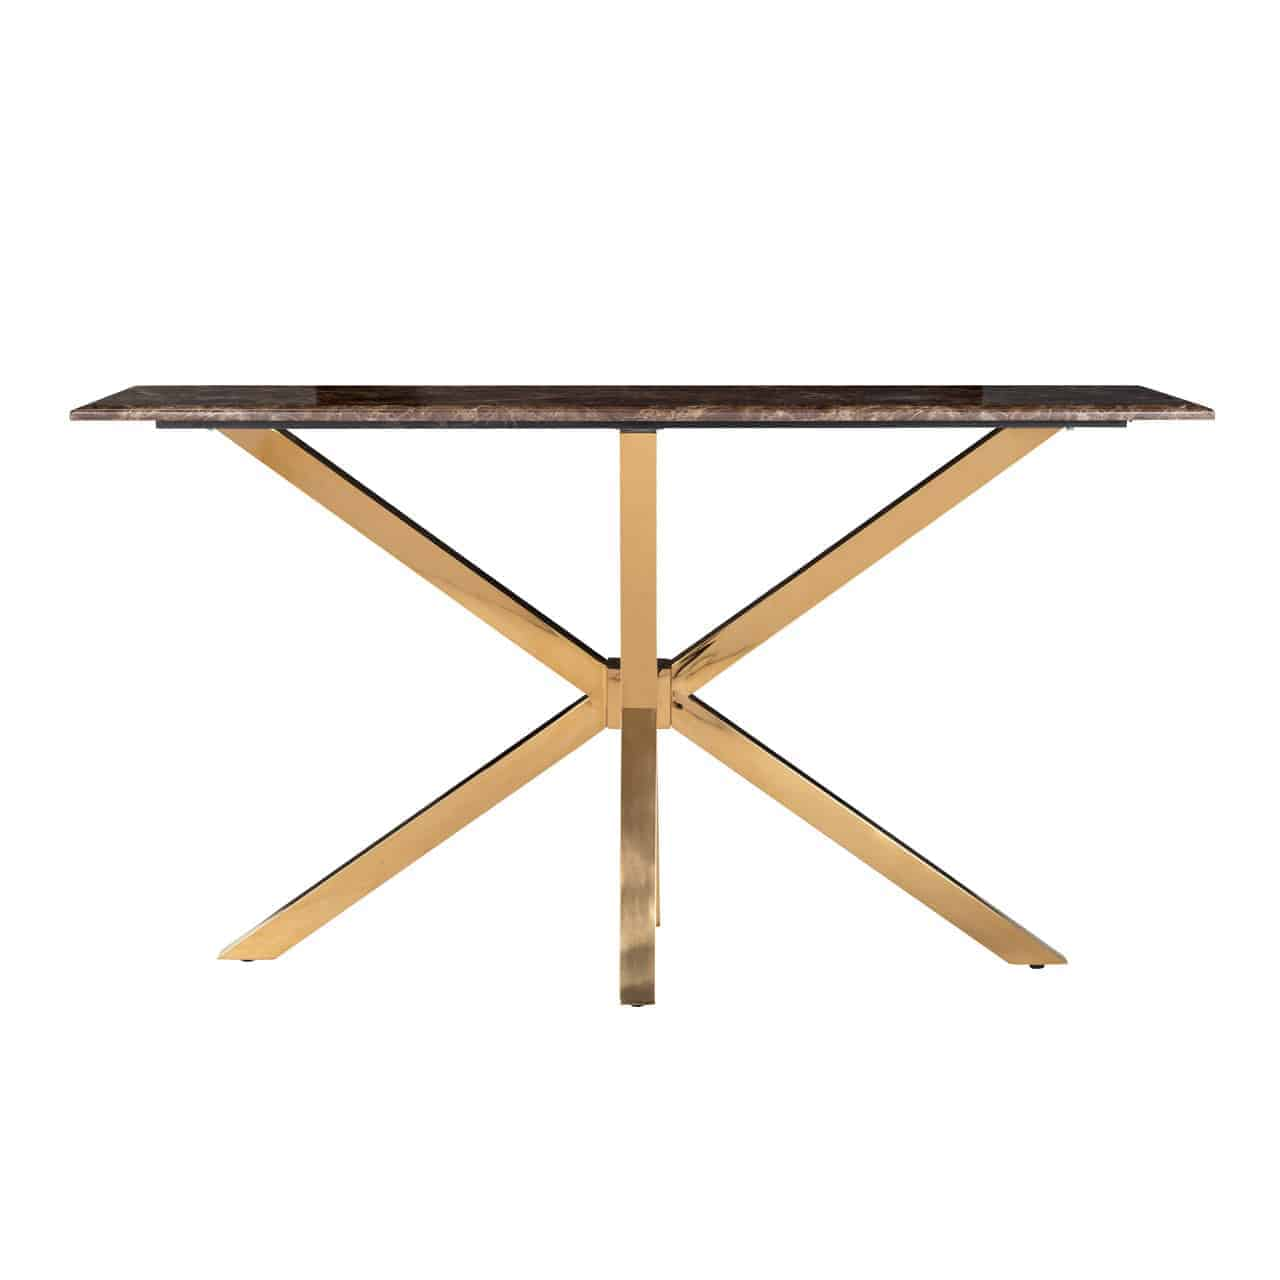

In [160]:
Image.open(test.files[0])

In [149]:
test = Img2Vec('resnet50')

In [107]:
print(test.device)
print(test.architecture)
print(test.model)

cuda:0
resnet50
ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1,

In [108]:
print(test.embed)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)


In [98]:
embedding = test.embed_image(Image.open("C:/Users/fergu/Documents/PersonalProjects/Image_Clustering/data/furniture_imgs/table1.jpg"))
print(embedding)

tensor([[[[0.2717]],

         [[0.0309]],

         [[0.0592]],

         ...,

         [[0.0275]],

         [[0.0466]],

         [[0.0000]]]], device='cuda:0', grad_fn=<MeanBackward1>)


In [100]:
embedding2 = test.embed_image(Image.open("C:/Users/fergu/Documents/PersonalProjects/Image_Clustering/data/furniture_imgs/table2.jpg"))
print(embedding)

tensor([[[[0.2717]],

         [[0.0309]],

         [[0.0592]],

         ...,

         [[0.0275]],

         [[0.0466]],

         [[0.0000]]]], device='cuda:0', grad_fn=<MeanBackward1>)


In [101]:
cosine = nn.CosineSimilarity(dim=1)

In [102]:
cosine(embedding, embedding2)[0]

tensor([[1.]], device='cuda:0', grad_fn=<SelectBackward0>)

In [6]:
def set_device():
    if torch.cuda.is_available():
        device = "cuda:0"
    else:
        device = "cpu"
    
    return device


def initiate_model(model_name: str):

    m = getattr(models, model_name)
    model = m(weights='DEFAULT')
    device = set_device()

    return model.to(device)


def obtain_children(model):
     
     model_embed = nn.Sequential(*list(model.children())[:-1])

     return model_embed


def obtain_classifier(model):

    model.classifier = model.classifier[:-1]
    
    return model


def assign_layer(model, model_name):

    embed_dict = {
        "resnet50": obtain_children,
        "vgg19":  obtain_classifier,
        "efficientnet_b0": obtain_classifier
    }

    model_embed = embed_dict[model_name](model)

    return model_embed